In [18]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Данные (y = 2x + 3 + шум)
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  
y = 2 * X + 3 + torch.randn(100, 1) * 2  

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


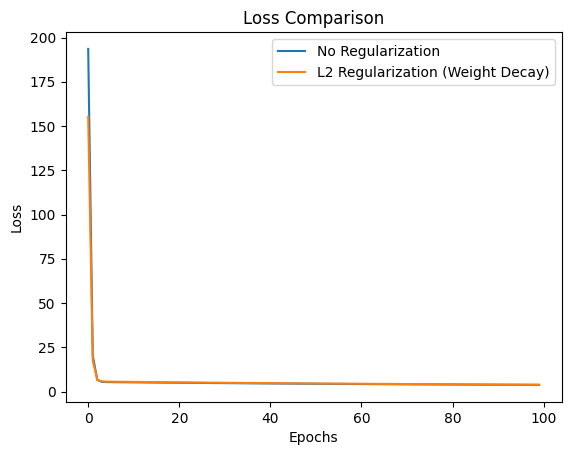

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Создаем данные (y = 2x + 3 + шум)
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  
y = 2 * X + 3 + torch.randn(100, 1) * 2  

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def train(model, optimizer, X, y, epochs=100):
    criterion = nn.MSELoss()
    loss_history = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        '''
        обновленый вес = вес - lr(лосс + weight_decay * вес, где вес - веса на предыдущей итерации
        '''
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

    return loss_history

model_no_reg = LinearRegression()
optimizer_no_reg = optim.SGD(model_no_reg.parameters(), lr=0.01)
loss_no_reg = train(model_no_reg, optimizer_no_reg, X, y)

model_l2 = LinearRegression()
optimizer_l2 = optim.SGD(model_l2.parameters(), lr=0.01, weight_decay=0.1)  # weight_decay - L2 регулеризация, лосс + 0,1*(сумма квадратов всех весов)
loss_l2 = train(model_l2, optimizer_l2, X, y)

plt.plot(loss_no_reg, label="No Regularization")
plt.plot(loss_l2, label="L2 Regularization (Weight Decay)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend()
plt.show()

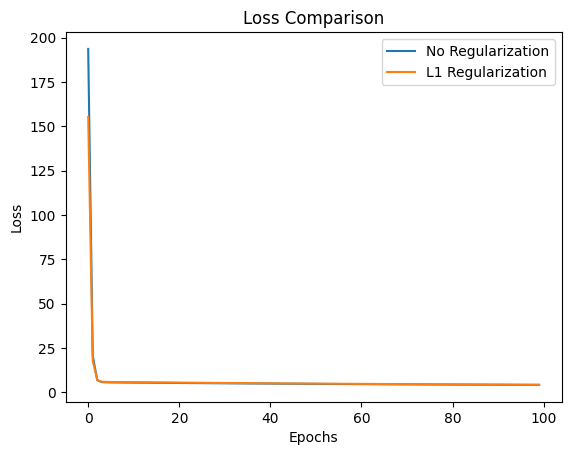

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Создаем данные (y = 2x + 3 + шум)
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  
y = 2 * X + 3 + torch.randn(100, 1) * 2  

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def train(model, optimizer, X, y, epochs=100, lambda_l1=0.1):
    criterion = nn.MSELoss()
    loss_history = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)

        l1_penalty = lambda_l1 * sum(torch.abs(param).sum() for param in model.parameters()) # сумма модулей квадратов всех весов
        loss += l1_penalty
        '''
        обновленый вес = вес - lr(лосс + weight_decay * (знак веса (sign(O), 1, -1, 0), где вес - веса на предыдущей итерации
        '''

        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

    return loss_history

# ✅ 1. Без регуляризации
model_no_reg = LinearRegression()
optimizer_no_reg = optim.SGD(model_no_reg.parameters(), lr=0.01)
loss_no_reg = train(model_no_reg, optimizer_no_reg, X, y)

# ✅ 2. С L1-регуляризацией
model_l1 = LinearRegression()
optimizer_l1 = optim.SGD(model_l1.parameters(), lr=0.01)
loss_l1 = train(model_l1, optimizer_l1, X, y, lambda_l1=0.1)

# 🔹 Построим график
plt.plot(loss_no_reg, label="No Regularization")
plt.plot(loss_l1, label="L1 Regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend()
plt.show()